# Task 1 - Iris FLower Classification

# Problem Statement    
    
    Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
    measurements. Now assume that you have the measurements of the iris flowers according to
    their species, and here your task is to train a machine learning model that can learn from the
    measurements of the iris species and classify them.

# Approach : 
    The classical machine learning tasks like Data Exploration, Data Cleaning, 
    Feature Engineering, Model Building and Model Testing. Using Classification 
    learning algorithms that’s best fit for the above case.

# Procedure :
    Step 1 : Import Libraries and Dataset
    
    Step 2 : Data Pre-processing
            1. Data Type and conversion
            2. Removing Irrelevant Columns
            3. Identifying & Treatment Missing Value 
            4. Identifying & Treatment Outliers
            5. Descriptive Analysis
            6. Correlation
            
    Step 3 : Data Visualization
            
    Step 4 : Breaking Data into 2 Parts          
            
    Step 5 : Data Partition  
    
    Step 6 : Model Building
            6.1 Logistic Regression

             Conclusion

# Step 1 :- Import Libraries and Dataset

In [17]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go  # Latest package for visualization plotly
import plotly.tools as tls
import plotly.figure_factory as ff

In [18]:
import pandas as pd
flower = pd.read_csv (r"C:\Users\admin\Desktop\Machine Learning\Oasis Infobyte Internship\Task 1\Iris.csv")

#first few rows
flower.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step 2 :- Data Pre-Processing 

1. Data Type and conversion
2. Removing Irrelevant Columns
3. Identifying & Treatment Missing Value 
4. Identifying & Treatment Outliers
5. Descriptive Analysis
6. Correlation

### 2.1 Data Type and Conversion

In [19]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* All the columns are numerical except Target column

### 2.2 Removing Irrelevent Columns

In [20]:
flower = flower.drop('Id', axis = 1)

### 2.3 Identifying and Treatment of Missing Values

In [21]:
# count the number of NaN values in each column
flower.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* No Missing values present in dataset

### 2.4 Identifying And Treatment of Outliers

<AxesSubplot:>

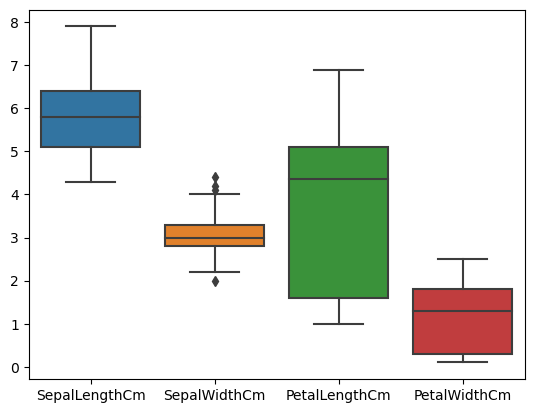

In [22]:
sns.boxplot(data = flower)

### 2.4.1 Winsorizing Technique to remove outliers

In [23]:
q1 = flower['SepalWidthCm'].quantile(0.25)
q3 = flower['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

4.05

In [24]:
flower['SepalWidthCm']=np.where(flower['SepalWidthCm'] < lower_limit,lower_limit,flower['SepalWidthCm']) # Lower limit

In [25]:
flower['SepalWidthCm']=np.where(flower['SepalWidthCm'] > upper_limit,upper_limit,flower['SepalWidthCm']) # upper limit

<AxesSubplot:>

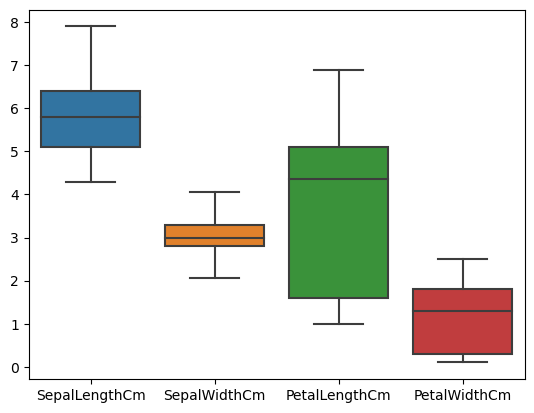

In [26]:
sns.boxplot(data = flower)

### 2.5 Descriptive Analysis

In [27]:
flower.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667
std,0.828066,0.423036,1.764420,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [28]:
flower.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


# Step 3 : Data Visualization 

<AxesSubplot:ylabel='Species'>

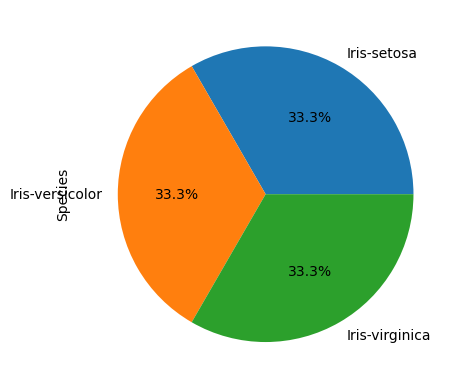

In [29]:
# series of counts
Flower_Class_count = flower.Species.value_counts()
Flower_Class_count.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

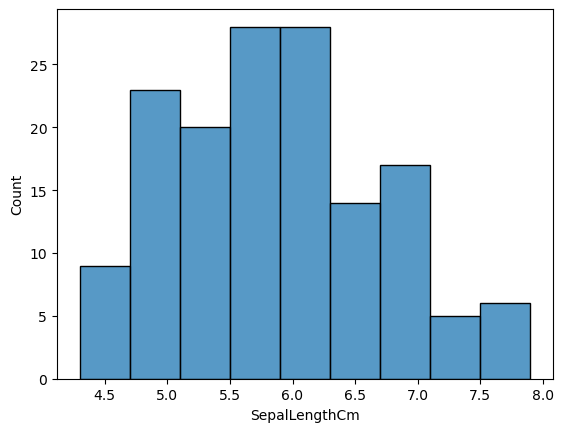

In [30]:
sns.histplot(x='SepalLengthCm',data=flower)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

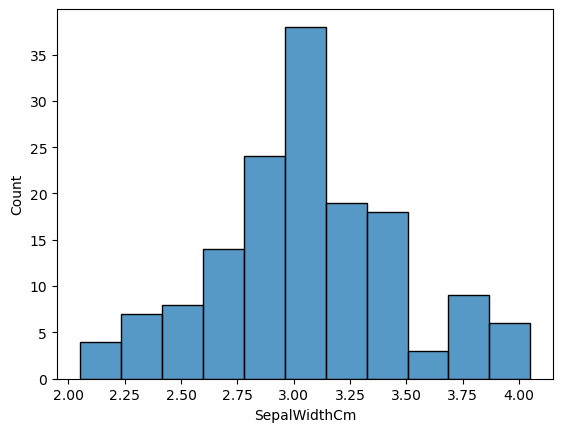

In [31]:
sns.histplot(x='SepalWidthCm',data=flower)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

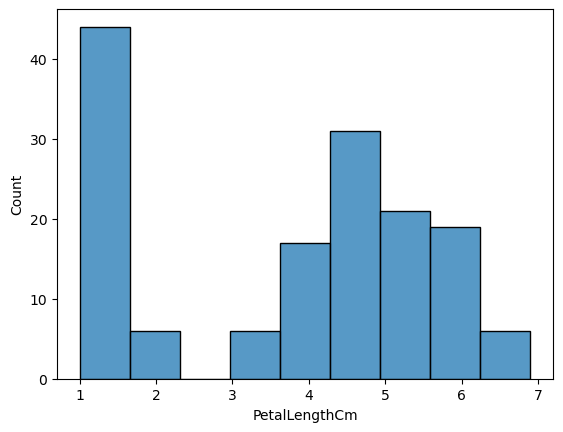

In [32]:
sns.histplot(x='PetalLengthCm',data=flower)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

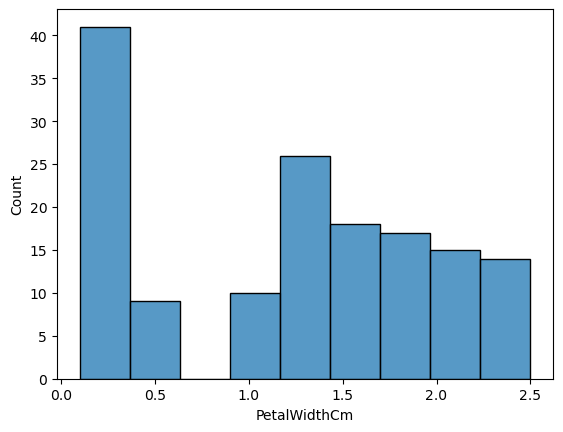

In [33]:
sns.histplot(x='PetalWidthCm',data=flower)

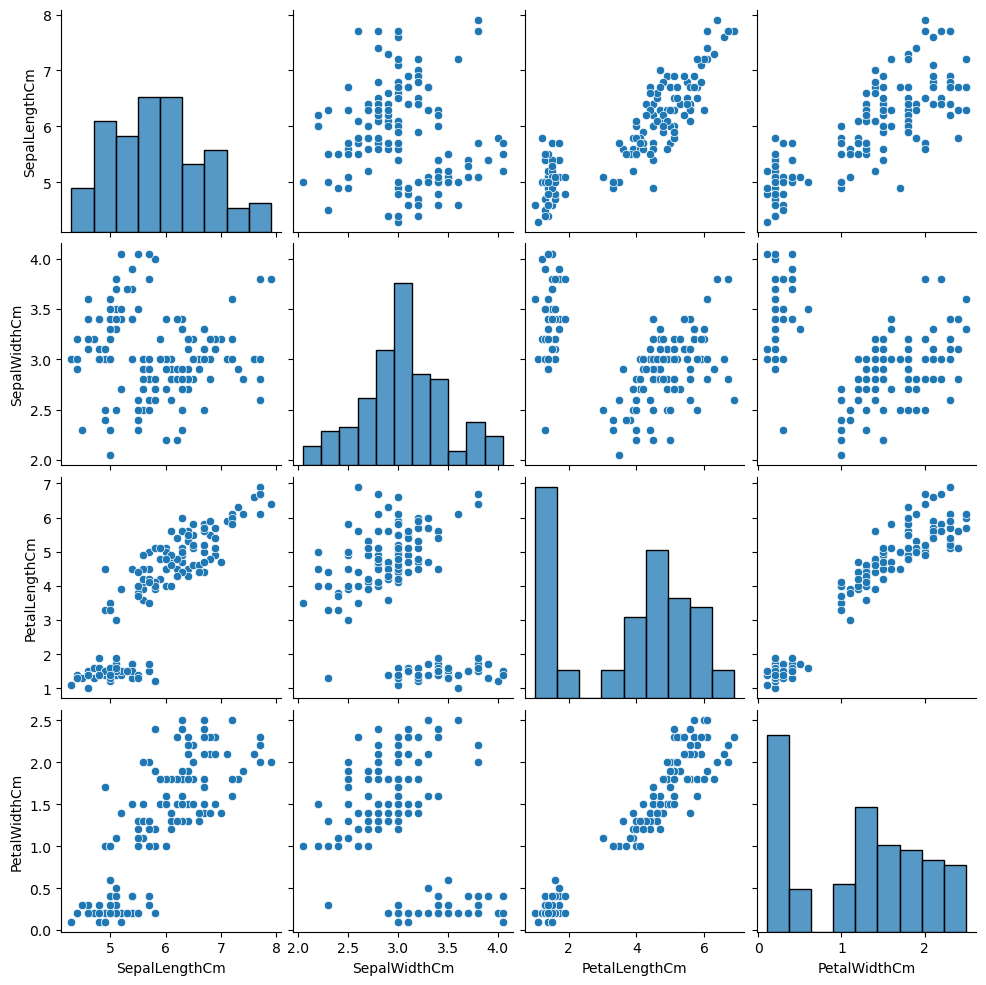

In [34]:
sns.pairplot(data = flower)

# Step 4 : Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable

In [35]:
# Quantitative Variable (Numbers)
Quantitative_Variable = flower[flower.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [36]:
# Qualitative Variable (Objects)
Qualitative_Variable = flower[flower.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


### Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Species
0,0
1,0
2,0
3,0
4,0


### Combining the data set 

In [38]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


# Step 5 : Data Partition 

In [39]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Species', axis = 1)
Y = Final_combined[['Species']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5129)

# Step 6 : Model building 

### Hypothesis

* H0 :- There is no log linear relationship between Species and all independent Variable

Vs 

* H1 :- There is log linear relationship between Species and all independent Variable

Alpha = 0.05 (5%)

### 6.1 Logistics Regression

In [40]:
from sklearn.linear_model import LogisticRegression  #Linear model include all the regression models
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [41]:
output.intercept_  # beta0

array([  9.54967227,   1.70862108, -11.25829335])

In [42]:
output.coef_  # Beta 1 , Beta 2... Beta n -- 

array([[-0.40580718,  0.89406346, -2.40935033, -0.98800351],
       [ 0.43328984, -0.09447798, -0.16442859, -0.83664508],
       [-0.02748266, -0.79958547,  2.57377892,  1.82464859]])

In [43]:
output.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

### Predictions on Train Dataset

In [44]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=output.predict(X_train)  # answer in terms of probability
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
109,7.2,3.60,6.1,2.5,2,2
110,6.5,3.20,5.1,2.0,2,2
64,5.6,2.90,3.6,1.3,1,1
132,6.4,2.80,5.6,2.2,2,2
32,5.2,4.05,1.5,0.1,0,0


In [45]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Species'])
matrix

array([[40,  0,  0],
       [ 0, 37,  1],
       [ 0,  2, 40]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(train['Species'],train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        39
           2       0.95      0.98      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### Predictions on Test Dataset

In [47]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=output.predict(X_test)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
4,5.0,3.6,1.4,0.2,0,0
39,5.1,3.4,1.5,0.2,0,0
30,4.8,3.1,1.6,0.2,0,0
91,6.1,3.0,4.6,1.4,1,1
14,5.8,4.0,1.2,0.2,0,0


In [48]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Species'])
print(matrix)

[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test['Species'],test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# CONCLUSION

* We can conclude that we understood the statistical techniques and modelling procedure for iris dataset.
* Accuracy obtained on test data is 100 %, because the records are very less in test dataset.
* The correlation matrix showed a strong relationship between sepal length and sepal width for the Iris Setosa only and a strong relationship between the petal length and petal widths for the Iris Versicolor only.
* However the relationship between the petal lengths and sepal lengths is very strong for the Iris Virginica with Iris Versicolor being only a little bit weaker.
* the average "petal length" for an Iris Setosa is much smaller than the other two classes.
* the "petal width" of the Setosa is about twelve times smaller than the petal width of the Virginica.
* The average "sepal width" of the Setosa however is actually larger than the averages for the other two species but not by a huge amount.